# 9. Houghova transformácia

In [2]:
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

Text(0.5, 1.0, 'Povodny obrazok')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


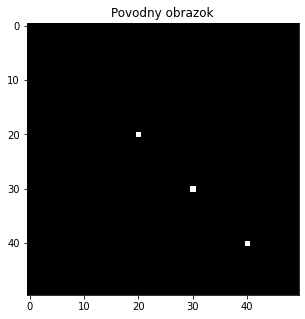

In [4]:
I = np.zeros((50,50))
I[20,20]=1
I[30,30]=1
I[40,40]=1
#I[4,14]=1

plt.figure(figsize=(5,5))
plt.imshow(I, cmap="gray")
plt.title("Povodny obrazok")

## rho = x * cos(theta) + y * sin(theta)

In [5]:
thetas = np.arange(0, np.pi, 0.01)
display("Theta has: "+ str(thetas.size)+" values.")

'Theta has: 315 values.'

(0.0, 179.9087476710785)

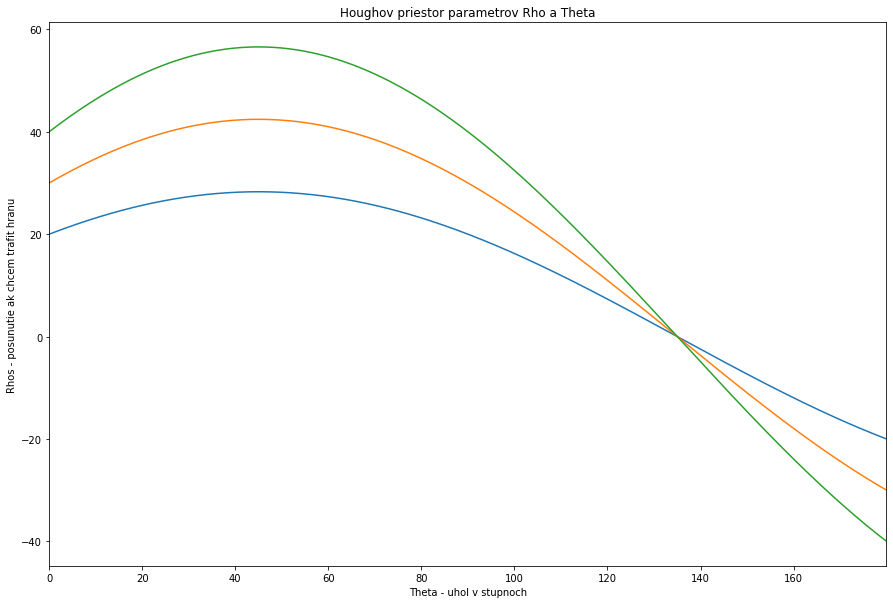

In [6]:
x,y = np.where(I==1)

plt.figure(figsize=(15,10))
rho_stack = []

for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    rho_stack.append(rhos)
    plt.plot(np.rad2deg(thetas), rhos)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - uhol v stupnoch")
plt.ylabel("Rhos - posunutie ak chcem trafit hranu")
plt.xlim(0,np.rad2deg(thetas[-1]))

In [7]:
rho_stack = np.array(rho_stack)

r1 = np.abs(rho_stack[0,:]-rho_stack[1,:])
r2 = np.abs(rho_stack[0,:]-rho_stack[2,:])
r3 = np.abs(rho_stack[1,:]-rho_stack[2,:])

min_dif = np.where((r1+r2+r3) == np.min(r1+r2+r3) )

rho_winner = rho_stack[0, min_dif]
theta_winner = thetas[min_dif]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format(rho_winner,np.rad2deg(theta_winner)))


'We found fitting  line with params Rho: [[-0.10763581]] pixels and Theta [135.21803965] degrees'

Text(0.5, 1.0, 'Obrazok s vypocitanou priamkou')

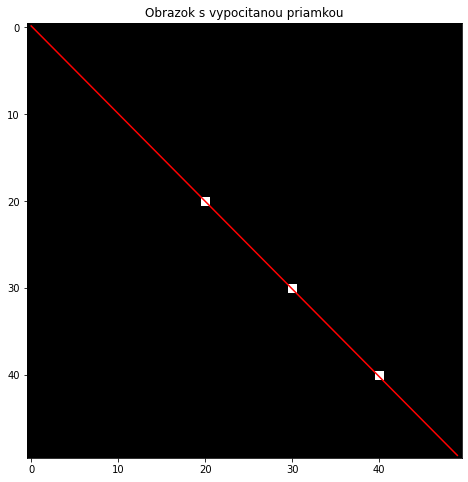

In [8]:
line_x = np.array([[0, I.shape[1]-1]])
line_y = (-np.cos(theta_winner)/np.sin(theta_winner))*line_x + rho_winner/np.sin(theta_winner)
plt.figure(figsize=(8,8))
plt.imshow(I,cmap="gray")
plt.plot(line_x.ravel(),line_y.ravel(),"r-")
plt.title("Obrazok s vypocitanou priamkou")

In [9]:
accumulator = []
for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    accumulator.append(rhos)
accumulator = np.array(rho_stack)

D = np.sqrt(I.shape[0]**2+ I.shape[1]**2) #uhlopriecka
rho_range =np.arange(-I.shape[1],D,1)   # ake realne hodnoty moze naberat priamka v obraze?

In [10]:
hough_space = np.zeros((rho_range.size, thetas.size))

### Akumulacia do disktretizovanej matice (obrazka *)

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru 121')

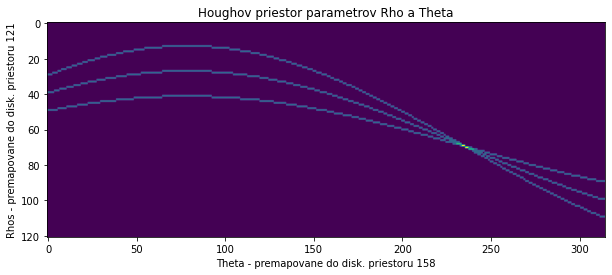

In [11]:
for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rho_range)

    hough_space[:hough_space.shape[0]-1, i] = np.flipud(y_hist)
plt.figure(figsize=(10,10))
plt.imshow(hough_space)

plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - premapovane do disk. priestoru 158")
plt.ylabel("Rhos - premapovane do disk. priestoru 121")

In [12]:
max_hough = np.max(hough_space)
x, y = np.where(hough_space == max_hough)
theta_winner= thetas[y[1]]
rho_winner = rho_range[rho_range.size - x[1]]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format([rho_winner],np.rad2deg(theta_winner)))

'We found fitting  line with params Rho: [2.0] pixels and Theta 134.64508185574346 degrees'

Text(0.5, 1.0, 'Detekovane hrany')

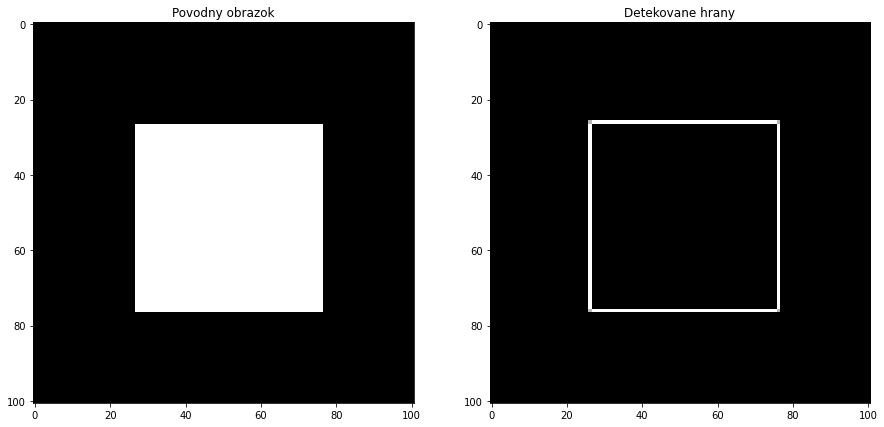

In [13]:
plt.figure(figsize=(15,10))
I = np.zeros((101, 101))
I[27:77,27:77] = 255
plt.subplot(121)
plt.imshow(I,cmap="gray")
plt.title("Povodny obrazok")
I = filters.roberts(I)
plt.subplot(122)
plt.imshow(I,cmap="gray")
plt.title("Detekovane hrany")

0.9999500004166653

Text(0, 0.5, 'Rhos')

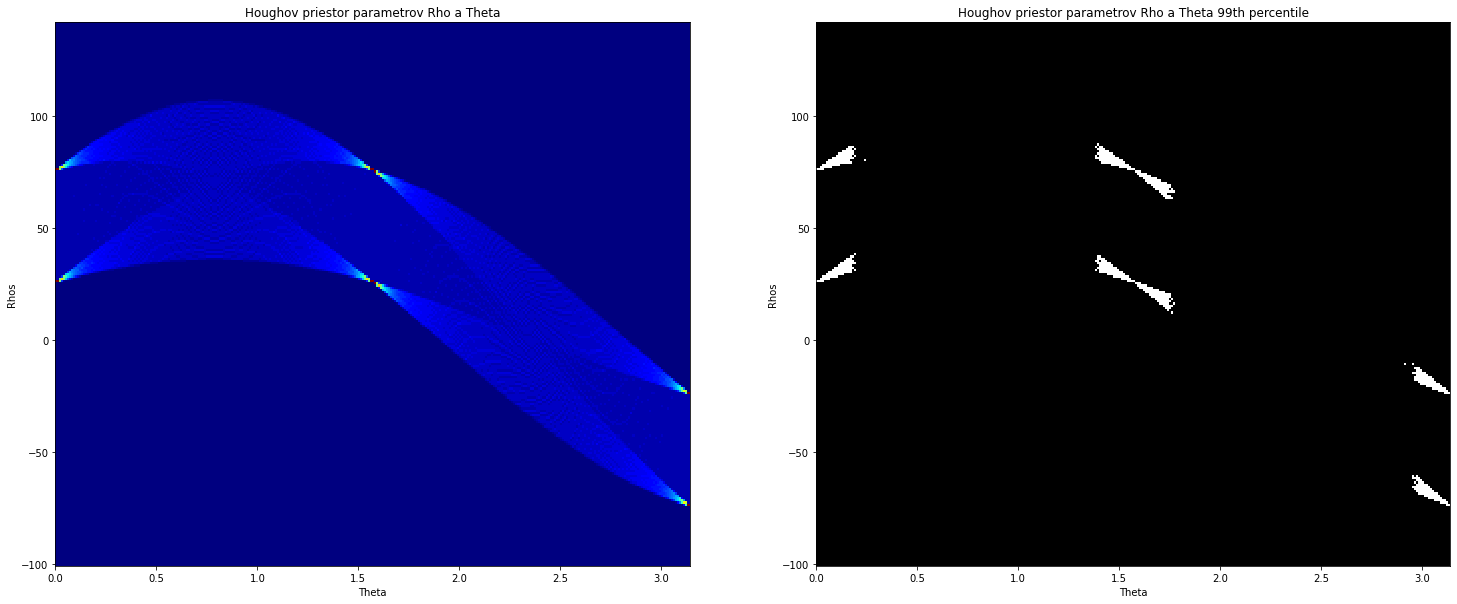

In [15]:
width, height = I.shape
D = (height**2 + width**2)**(1/2)

thetas = np.arange(0,np.pi,0.01)
rhos = np.arange(-width,D,1)

hough_space = np.zeros((rhos.size, thetas.size))

y, x = np.where(I > 0)

accumulator = np.zeros((x.size, thetas.size))


cos_vals = np.matmul(np.expand_dims(np.arange(0,width,1),axis=0).T,
                     np.expand_dims(np.cos(thetas),axis=0))

sin_vals = np.matmul(np.expand_dims(np.arange(0,height,1),axis=0).T,
                     np.expand_dims(np.sin(thetas),axis=0))

display(cos_vals[1][1])

accumulator[0:len(x),:] =  cos_vals[x-1,:] + sin_vals[y-1,:]


for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rhos)
    #print(np.flipud(y_hist))
    hough_space[1:,i] = y_hist

plt.figure(figsize=(25,10))
plt.subplot(121)
plt.pcolor(thetas,rhos,hough_space,cmap="jet")
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta")
plt.ylabel("Rhos")
plt.subplot(122)
plt.pcolor(thetas,rhos,hough_space> np.percentile(hough_space,99),cmap="gray")
plt.title("Houghov priestor parametrov Rho a Theta 99th percentile")
plt.xlabel("Theta")
plt.ylabel("Rhos")

# D.U. Dokoncit cvicenie  64 - 68

In [16]:
def ind2sub(array_shape, ind):
    rows = (ind.astype('int') / array_shape[1])
    cols = (ind.astype('int') % array_shape[1]) # or numpy.mod(ind.astype('int'), array_shape[1])
    return (int(rows), int(cols))

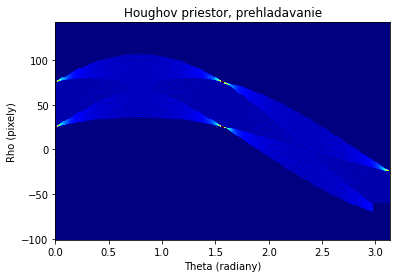

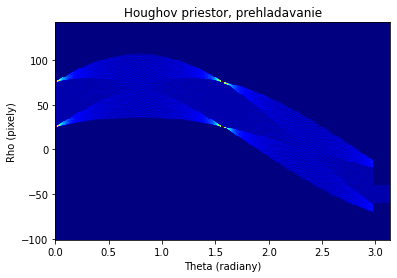

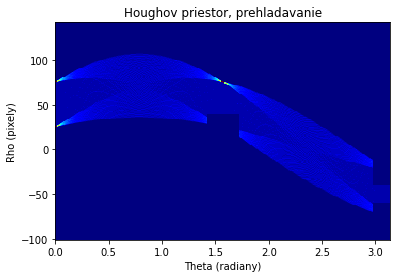

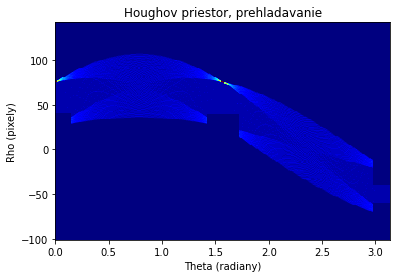

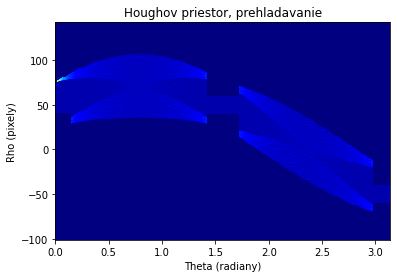

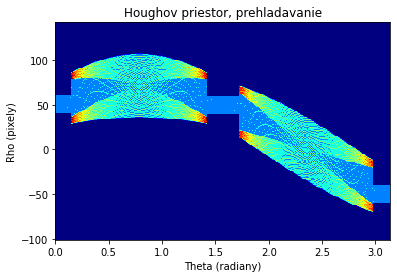

In [17]:
thresh = 0.5*np.max(hough_space.ravel())
supp = 15

continue_search = 1
peaks = []


plotalg = True
while continue_search:
#for i in range(0,4):
    value = np.max(hough_space)
    index = np.argmax(hough_space.ravel())
    if value > thresh:
        
        index_rho,index_theta = ind2sub(hough_space.shape,index)
        peaks.append((thetas[index_theta],rhos[index_rho]))
                
        x_min = index_rho - supp
        if x_min < 0:
            x_min = 0

       
        x_max = index_rho+supp
        if x_max > hough_space.shape[0]:
            x_max = hough_space.shape[0]

        y_min = index_theta - supp
        if y_min < 0:
            y_min = 0

        y_max = index_theta + supp
        if y_max > hough_space.shape[1]:
            y_max = hough_space.shape[1]

   
        hough_space[x_min:x_max,y_min:y_max] = 0

        if plotalg:
            plt.figure()
            plt.pcolor(thetas,rhos,hough_space,cmap="jet")
            plt.title('Houghov priestor, prehladavanie')
            plt.xlabel("Theta (radiany)")
            plt.ylabel("Rho (pixely)")
    else:
        continue_search = 0

        


In [18]:
peaks

[(3.13, -74.0),
 (3.13, -24.0),
 (1.58, 25.0),
 (0.0, 26.0),
 (1.58, 75.0),
 (0.0, 76.0)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered

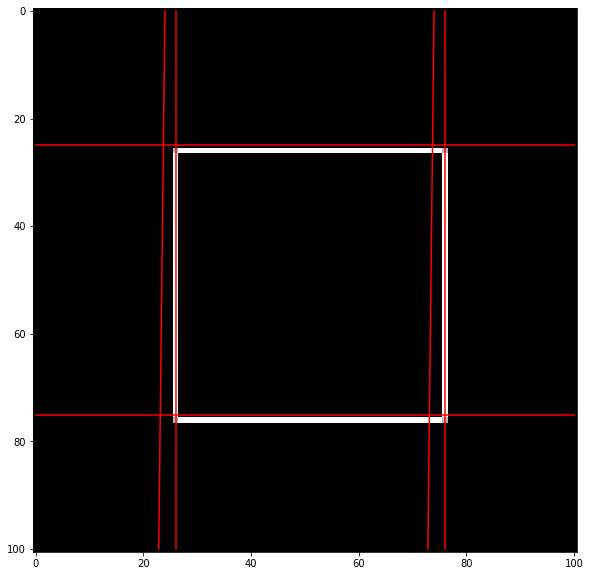

In [20]:
plt.figure(figsize=(15,10))
plt.imshow(I,cmap="gray")
for peak in peaks:
#for i in range(0,1):
    theta, rho = peak

    cosTheta = round(np.cos(theta))
    sinTheta = round(np.sin(theta))

    line_x = np.array([0, width-1])
    line_y = (-cosTheta/sinTheta)*line_x + rho/sinTheta
    if np.sum(np.isnan(line_y))>0:
        line_y = np.array([0,height-1])
        line_x = (line_y)*(np.sin(theta)/np.cos(theta))+(rho/np.cos(theta))

        
    plt.plot(line_x,line_y,"r-")
    

In [22]:
!wget https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/circuit.tif;

--2020-11-22 13:44:20--  https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/circuit.tif
Resolving www.bogotobogo.com (www.bogotobogo.com)... 173.254.30.214
Connecting to www.bogotobogo.com (www.bogotobogo.com)|173.254.30.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76770 (75K) [image/tiff]
Saving to: ‘circuit.tif’

circuit.tif         100%[===================>]  74.97K   238KB/s    in 0.3s    

2020-11-22 13:44:22 (238 KB/s) - ‘circuit.tif’ saved [76770/76770]



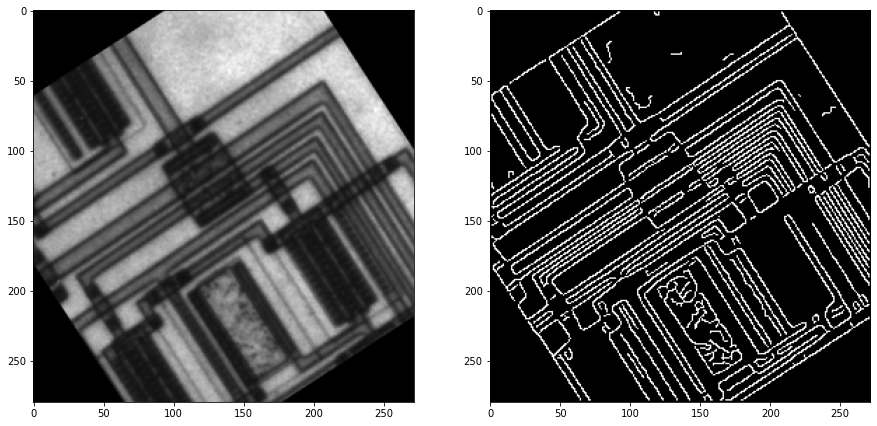

In [37]:
from skimage import io,transform
from skimage import feature
plt.figure(figsize=(15,10))
img = io.imread("./circuit.tif")
img = transform.rotate(img,33)
img_canny = feature.canny(img,1)

plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.imshow(img_canny,cmap="gray")

In [ ]:
#TODO:
# dorobit koniec na strane 67
#graf nie je rovnaký

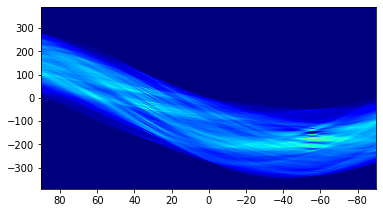

In [62]:
from skimage.transform import hough_line, hough_line_peaks,probabilistic_hough_line
h, theta, d = hough_line(img_canny)


plt.figure()
plt.imshow(h,
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[0], d[-1]],
             cmap="jet", aspect=1/8)

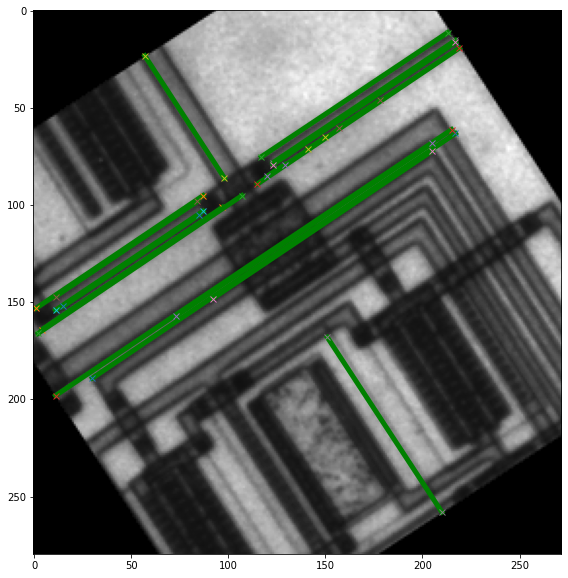

In [83]:
lines = probabilistic_hough_line(img_canny, threshold=int(0.9*max(h.ravel())), line_length=7,line_gap=5)

plt.figure(figsize=(15,10))
plt.imshow(img,cmap="gray")
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=5,color="green")
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),"x", linewidth=5)
